In [ ]:
import torch
x = torch.FloatTensor(10,4)
splits = x.split(4,dim=0)
for s in splits:
    print(s.size())

In [ ]:
x = torch.FloatTensor([[[1,1],[2,2]],[[3,3],[4,4]],[[5,5],[6,6]]])
indice = torch.LongTensor([2,1])
print(x.size())
y = x.index_select(dim=0,index=indice)#
print(y.size())
print(y)

In [ ]:
import torch.nn as nn
x = torch.FloatTensor(4,3)
W = torch.Tensor([[1,2],[3,4],[5,6]])
b = torch.Tensor([2,2])

def linear(x,W,b):
    y = torch.matmul(x,W)+b
    return y
y = linear(x,W,b)
print(y,y.size())

class myLinear(nn.Module):
    def __init__(self,input_dim=3,output_dim =2):
        self.input_dim=input_dim
        self.output_dim=output_dim

        super().__init__()
        self.W = nn.parameter(torch.FloatTensor(input_dim,output_dim))
        self.b = nn.parameter(torch.FloatTensor(output_dim))

    def forward(self,x):
        y = torch.matmul(x,self.W)+self.b
        return y

linear = myLinear(3,2)
y = linear(x)
print(y,y.size())


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.FloatTensor([[1,1],[2,2]])
x_hat = torch.FloatTensor([[0,0],[0,0]])
print(F.mse_loss(x_hat,x))
print(F.mse_loss(x_hat, x, reduction = 'sum'))
print(F.mse_loss(x_hat, x, reduction = 'none'))


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target
sns.pairplot(df[['class']+list(df.columns[:10])])
plt.show()

In [ ]:
cols = ["mean radius","mean texture","mean smoothness","mean compactness","mean concave points","worst radius","worst texture","worst smoothness","worst compactness","worst concave points","class"]
for c in cols[:-1]:
    sns.histplot(df, x = c, hue = cols[-1], bins =50, stat = 'probability')
    plt. show()


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

cols = ["mean radius","mean texture","mean smoothness","mean compactness","mean concave points","worst radius","worst texture","worst smoothness","worst compactness","worst concave points","class"]

data = torch.from_numpy(df[cols].values).float()
x = data[:,:-1]
y = data[:,-1:]
print(x.shape,y.shape)
n_epochs =2000
learning_rate = 1e-2
print_interval = 10000

class Mymodel(nn.Module):

    def __init__(self,input_dim,output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        super().__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        self.act = nn.Sigmoid()
    def forward(self,x):
        y = self.act(self.linear(x))
        return y
    
model = Mymodel(input_dim=x.size(-1),output_dim=y.size(-1))
crit = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr = learning_rate)

for i in range(n_epochs):
    y_hat = model(x)
    loss = crit(y_hat,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(i+1%print_interval):
        print("epoch %d : loss %.4e" % (i+1,loss))

torch.Size([569, 10]) torch.Size([569, 1])
epoch 1 : loss 3.4930e+00
epoch 2 : loss 8.0139e-01
epoch 3 : loss 1.0036e+00
epoch 4 : loss 1.3780e+00
epoch 5 : loss 1.1660e+00
epoch 6 : loss 1.4967e+00
epoch 7 : loss 1.1013e+00
epoch 8 : loss 1.4242e+00
epoch 9 : loss 1.1155e+00
epoch 10 : loss 1.4133e+00
epoch 11 : loss 1.1046e+00
epoch 12 : loss 1.3839e+00
epoch 13 : loss 1.1004e+00
epoch 14 : loss 1.3615e+00
epoch 15 : loss 1.0939e+00
epoch 16 : loss 1.3388e+00
epoch 17 : loss 1.0876e+00
epoch 18 : loss 1.3177e+00
epoch 19 : loss 1.0811e+00
epoch 20 : loss 1.2978e+00
epoch 21 : loss 1.0745e+00
epoch 22 : loss 1.2792e+00
epoch 23 : loss 1.0679e+00
epoch 24 : loss 1.2619e+00
epoch 25 : loss 1.0614e+00
epoch 26 : loss 1.2457e+00
epoch 27 : loss 1.0550e+00
epoch 28 : loss 1.2306e+00
epoch 29 : loss 1.0487e+00
epoch 30 : loss 1.2167e+00
epoch 31 : loss 1.0427e+00
epoch 32 : loss 1.2037e+00
epoch 33 : loss 1.0369e+00
epoch 34 : loss 1.1918e+00
epoch 35 : loss 1.0314e+00
epoch 36 : loss 1.180

accuracy:0.8278


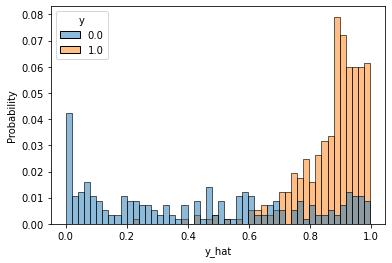

In [4]:
correct_cnt = (y==(y_hat>0.5)).sum()
total_cnt = float(y.size(0))
print('accuracy:%.4f' % (correct_cnt/total_cnt))

df = pd.DataFrame(torch.cat([y,y_hat],dim=1).detach().numpy(),columns=["y","y_hat"])
sns.histplot(df,x='y_hat',hue='y',bins=50,stat='probability')
plt.show()